# Loading Libraries

In [79]:
library(ggplot2)
library(dplyr)
library(ggthemes)
library(tidyr)
library(psych)
library(plotly)
library(lime)
library(GGally)
library(performance) 
library(MLmetrics)
library(lmtest)
library(car)
library(DataExplorer)
library(caret)
library(ROCR)
library(corrplot)
library(pROC)

corrplot 0.92 loaded



# Reading Data

In [2]:
data <- read.csv('default of credit card clients.csv')

In [3]:
head(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [4]:
summary(data)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

# Data Pre-Processing

In [5]:
str(data)

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num  3913 2682 29239 46990 8617 ...
 $ BILL_AMT2                 : num  3102 1725 14027 48233 5670 ...
 $ BILL_AMT3                 : n

Checking for null and NA values

In [6]:
colSums(is.na(data)) 
# There are no missing values

ID                  LIMIT_BAL 
                         0                          0 
                       SEX                  EDUCATION 
                         0                          0 
                  MARRIAGE                        AGE 
                         0                          0 
                     PAY_0                      PAY_2 
                         0                          0 
                     PAY_3                      PAY_4 
                         0                          0 
                     PAY_5                      PAY_6 
                         0                          0 
                 BILL_AMT1                  BILL_AMT2 
                         0                          0 
                 BILL_AMT3                  BILL_AMT4 
                         0                          0 
                 BILL_AMT5                  BILL_AMT6 
                         0                          0 
                  PAY_AMT1                   PAY_AMT2 
                         0                          0 
                  PAY_AMT3                   PAY_AMT4 
                         0                          0 
                  PAY_AMT5                   PAY_AMT6 
                         0                          0 
default.payment.next.month 
                         0

Renaming the features names

In [7]:
data <- data %>% rename('PAY_1' = 'PAY_0')

Checking for duplicate rows

In [8]:
unique(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,⋯,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,⋯,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,⋯,12211,11793,3719,3329,0,432,1000,1000,1000,0


Converting the categorical features into factors

In [9]:
#changing the MARRIAGE feature into factor and assigning levels
data$MARRIAGE <- as.factor(data$MARRIAGE)
#MARRIAGE : Marital status (0=Unknown, 1=Married, 2=Single, 3=Others)
levels(data$MARRIAGE) <- c("Unknown", "Married", "Single", "Others") 

In [10]:
#changing the education feature into factor and assigning levels
data$EDUCATION <- as.factor(data$EDUCATION)
#EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 0,5,6=unknown)
levels(data$EDUCATION) <- c("Unknown", "Graduate School", "University", "High School", "Others", "Unknown","Unknown")

In [11]:
# changing Sex feature into factor and assigning levels
data$SEX <- as.factor(data$SEX)
#SEX : (1=Male, 2=Female)
levels(data$SEX) <- c("Male", "Female")

In [12]:
# changing default payment next month into factor and assigning levels
data$default.payment.next.month <- as.factor(data$default.payment.next.month)
# Default : (0=No, 1=Yes)
levels(data$default.payment.next.month) <- c("Not Default", "Default")

In [13]:
# Repayment feature are also a categorcial in nature so converting them into factors
data$PAY_1 <- as.factor(data$PAY_1)
data$PAY_2 <- as.factor(data$PAY_2)
data$PAY_3 <- as.factor(data$PAY_3)
data$PAY_4 <- as.factor(data$PAY_4)
data$PAY_5 <- as.factor(data$PAY_5)
data$PAY_6 <- as.factor(data$PAY_6)

In [14]:
# changing the age into factors and assigning levels for better understanding of the data
data$AGE<-cut(data$AGE, breaks = c( 10, 30,50,100), labels = c("Young", "Middle","Senior"))

In [15]:
head(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,20000,Female,University,Married,Young,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,Default
2,2,120000,Female,University,Single,Young,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,Default
3,3,90000,Female,University,Single,Middle,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,Not Default
4,4,50000,Female,University,Married,Middle,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,Not Default
5,5,50000,Male,University,Married,Senior,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,Not Default
6,6,50000,Male,Graduate School,Single,Middle,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,Not Default


# Exploratory Data Analysis

Warning message:
"Use of `data$LIMIT_BAL` is discouraged.
ℹ Use `LIMIT_BAL` instead."


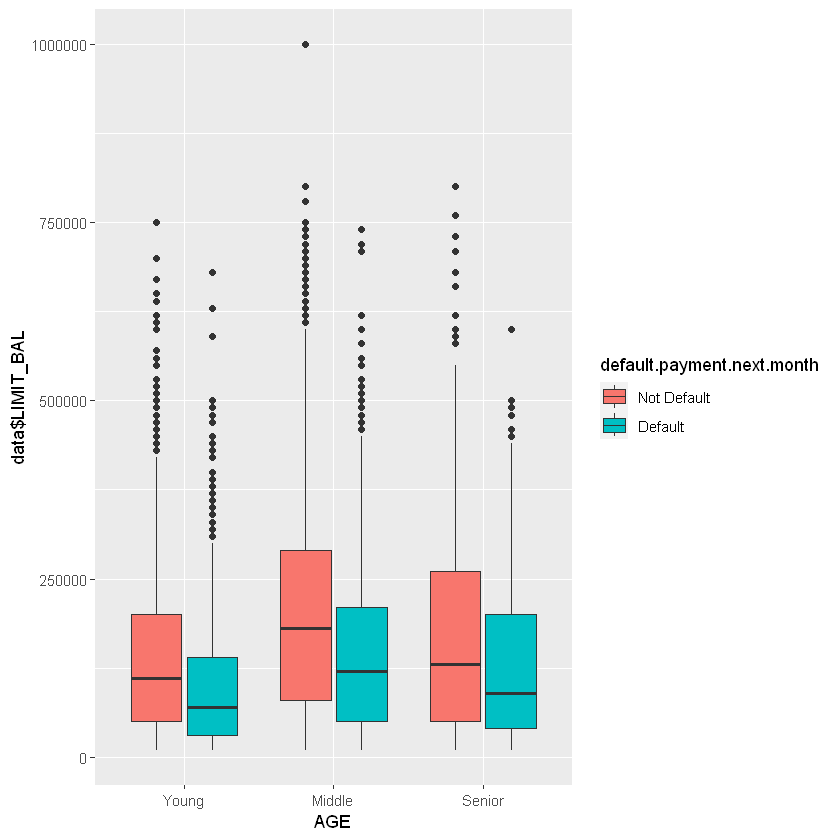

In [16]:
ggplot(data=data,mapping = aes(x=AGE,y=data$LIMIT_BAL,fill=default.payment.next.month)) + geom_boxplot() 

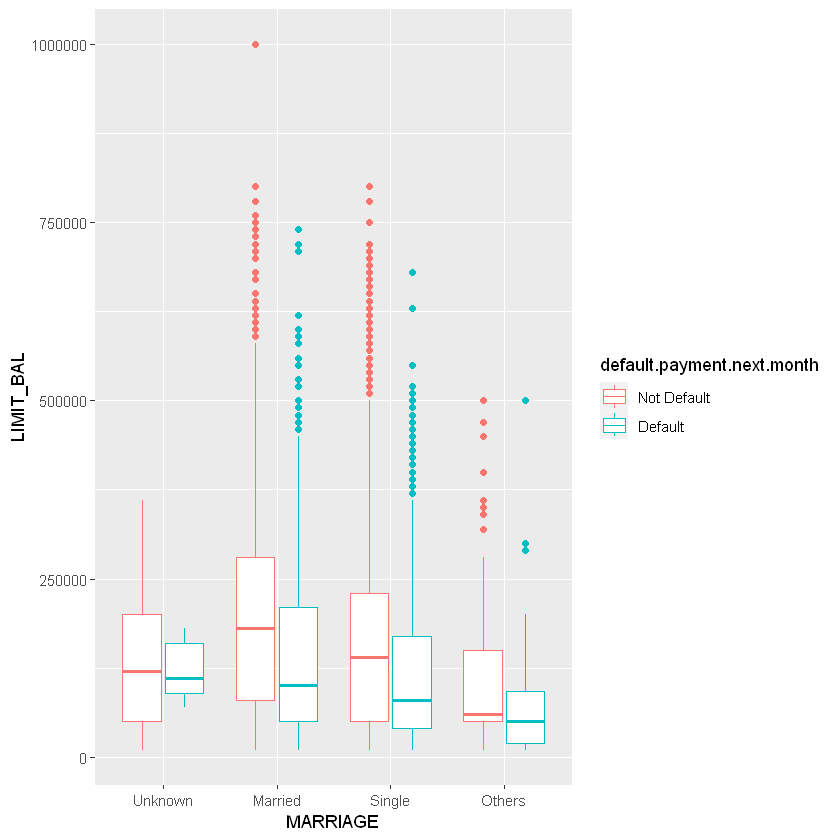

In [17]:
ggplot(data=data, aes(x=MARRIAGE, y=LIMIT_BAL, color = default.payment.next.month))+
  geom_boxplot()

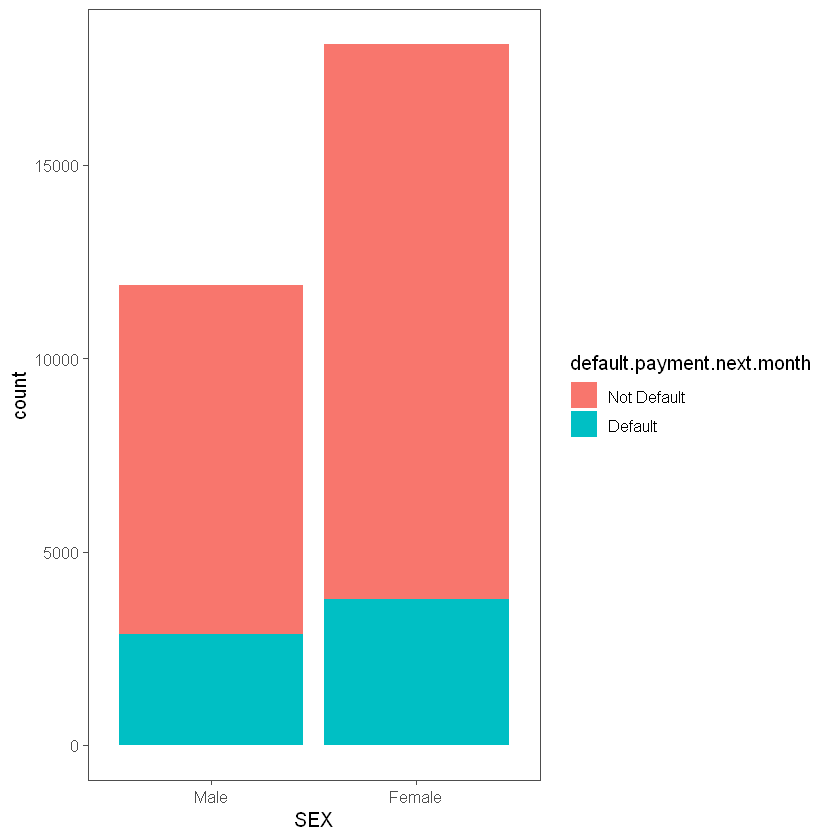

In [18]:
ggplot(data=data, mapping = aes(x=SEX, fill=default.payment.next.month)) + geom_bar()+theme_few()

Warning message in ggcorr(data, hjust = 1, label = TRUE):
"data in column(s) 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month' are not numeric and were ignored"


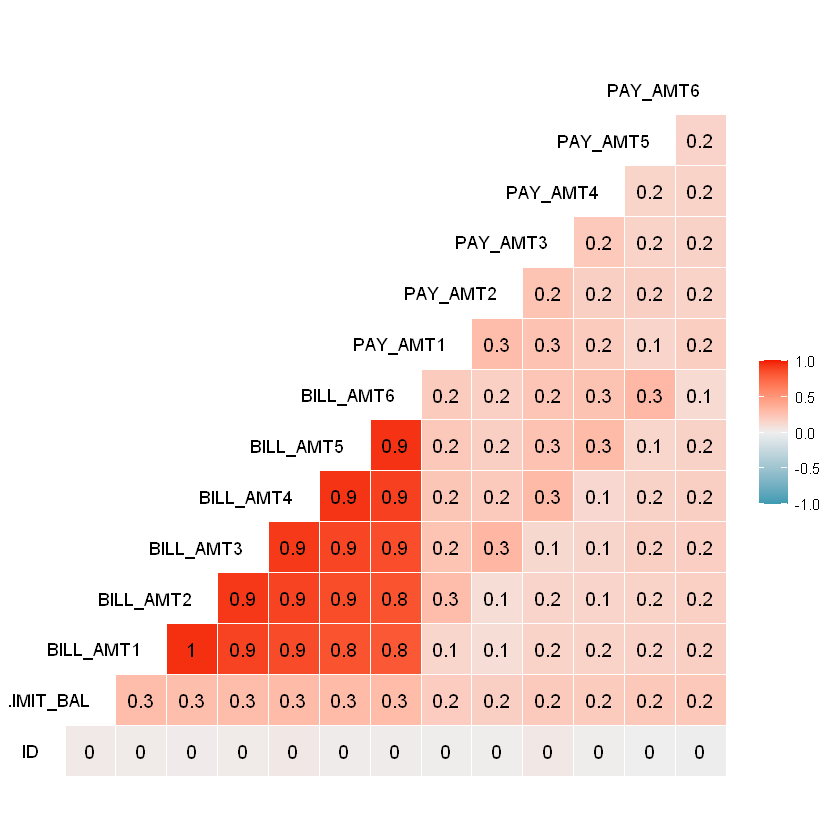

In [19]:
ggcorr(data, hjust =1, label = TRUE)
#Result: When we reflect the correlations between limit balances, bill amounts and payments amounts; it presents us that there’s a low correlation between the limit balances and payments and bill amounts. Howevet it can be seen that bill amounts has high correlation between each other as expected since the bills a reflecting the cumulative amounts.

# Data Transformation

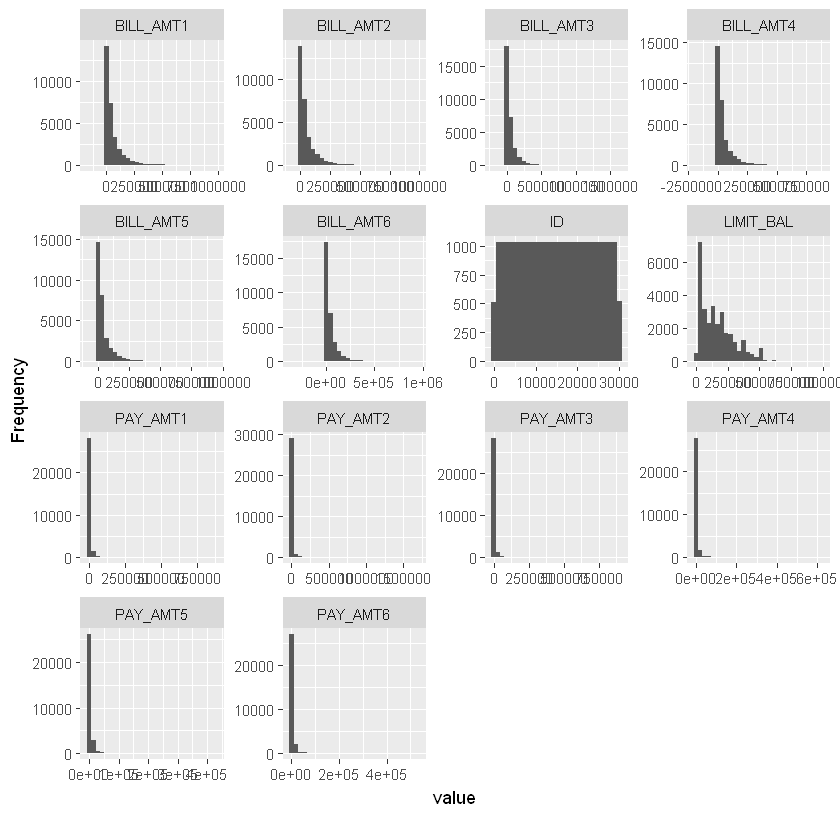

In [20]:
plot_histogram(data)

In [21]:
#deleting columns
data_new <- select(data, -one_of('ID','AGE', 'BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'))

head(data_new)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,20000,Female,University,Married,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,Default
2,120000,Female,University,Single,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,Default
3,90000,Female,University,Single,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,Not Default
4,50000,Female,University,Married,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,Not Default
5,50000,Male,University,Married,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,Not Default
6,50000,Male,Graduate School,Single,0,0,0,0,0,0,64400,2500,1815,657,1000,1000,800,Not Default


# Model Building

In [24]:
set.seed(100)
split <- sample(nrow(data_new), nrow(data_new)*0.7)

data_train <- data_new[split,]
data_test <- data_new[-split,]

In [25]:
dim(data_train)
dim(data_test)

[1] 21000    18

[1] 9000   18

# Logistic Regression

In [51]:
log_reg_model <- glm(default.payment.next.month ~ ., data=data_train, family=binomial)
summary(log_reg_model)


Call:
glm(formula = default.payment.next.month ~ ., family = binomial, 
    data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2865  -0.6017  -0.5169  -0.3265   3.1770  

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -4.391e+00  1.090e+00  -4.028 5.62e-05 ***
LIMIT_BAL                -1.765e-06  2.055e-07  -8.588  < 2e-16 ***
SEXFemale                -1.304e-01  3.800e-02  -3.430 0.000603 ***
EDUCATIONGraduate School  1.092e+00  2.614e-01   4.177 2.96e-05 ***
EDUCATIONUniversity       1.127e+00  2.604e-01   4.326 1.52e-05 ***
EDUCATIONHigh School      1.068e+00  2.630e-01   4.062 4.87e-05 ***
EDUCATIONOthers           2.733e-01  5.002e-01   0.546 0.584777    
MARRIAGEMarried           2.198e+00  1.056e+00   2.082 0.037350 *  
MARRIAGESingle            2.014e+00  1.056e+00   1.907 0.056533 .  
MARRIAGEOthers            2.191e+00  1.070e+00   2.049

In [52]:
predictions_log_model <- predict(log_reg_model, data_test, type="response")
predictions_log_model <- ifelse(predictions_log_model > 0.5, 1, 0)
head(predictions_log_model, 50)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


5   6   9  11  12  13  17  38  39  40  45  46  48  52  53  54  55  58  64  65 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0 
 71  73  75  84  85  87  88  95 100 107 114 117 119 120 121 126 127 136 138 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0 
143 145 147 150 155 160 169 185 186 188 
  0   0   0   0   0   1   0   0   0   1

Model Evaluation

In [55]:
table(predictions_log_model, data_test[,18])

                 
log.prediction.rd Not Default Default
                0        6748    1238
                1         326     688

In [56]:
accuracy <- table(predictions_log_model, data_test[,18])
sum(diag(accuracy))/sum(accuracy)

[1] 0.8262222

# Knn Model

In [59]:
# Setting the control parameters
trctrl <- trainControl(method = "repeatedcv",
                       number = 10,
                       repeats = 3)
set.seed(3333)
knn_fit  <- train(default.payment.next.month ~ ., 
                  data = data_train,
                  method = "knn",
                  trControl = trctrl,
                  preProcess = c("center", "scale"),
                  tuneLength = 10)
# kNN model summary
knn_fit 

Installing package into 'C:/Users/usama/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'mlbench', 'xtable', 'slam'




package 'mlbench' successfully unpacked and MD5 sums checked
package 'xtable' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\usama\AppData\Local\Temp\RtmpQhEkJD\downloaded_packages


Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.defa

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_58, PAY_68"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_58, PAY_68"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: PAY_41"
Warning message in

k-Nearest Neighbors 

21000 samples
   17 predictor
    2 classes: 'Not Default', 'Default' 

Pre-processing: centered (74), scaled (74) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 18900, 18900, 18900, 18900, 18900, 18900, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7944127  0.3284258
   7  0.8038571  0.3444947
   9  0.8081429  0.3526995
  11  0.8107619  0.3573085
  13  0.8126349  0.3605352
  15  0.8131587  0.3599656
  17  0.8133810  0.3600173
  19  0.8140794  0.3631098
  21  0.8148730  0.3640090
  23  0.8148730  0.3622374

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

In [62]:
kNNPred <- predict(knn_fit, data_test, type = "raw")
# confusion matrix
table(Predicted = kNNPred, Actual = data_test$default.payment.next.month)

             Actual
Predicted     Not Default Default
  Not Default        6697    1218
  Default             377     708

In [65]:
accuracy <- table(kNNPred, data_test[,18])
sum(diag(accuracy))/sum(accuracy)

[1] 0.8227778

In [70]:
kNNPred <- predict(knn_fit, data_test,type = "raw")
kNNPredObj <- prediction(as.numeric(kNNPred),as.numeric(data_test$default.payment.next.month))
kNNPerfObj <- performance(kNNPredObj, "tpr","fpr")

# Comparing the AUC OF the Both models

AUC of Logistic Regression Model

In [61]:
auc(data_test$default.payment.next.month, predictions_log_model)

Setting levels: control = Not Default, case = Default

Setting direction: controls < cases



Area under the curve: 0.6556

AUC of kNN Model

In [72]:
aucLR <- performance(kNNPredObj, measure = "auc")
aucLR <- aucLR@y.values[[1]]
aucLR

[1] 0.6570831